In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [45]:
df = pd.read_csv('train.csv')

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


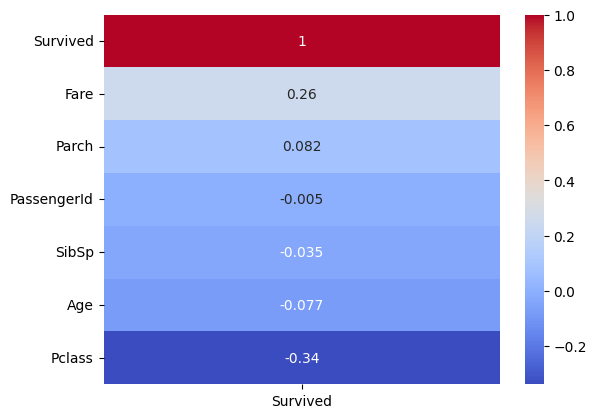

In [47]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['Survived']].sort_values(by='Survived',ascending=False),annot=True,cmap='coolwarm')
plt.show()

In [48]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
# df['Ticket_prefix'] = df['Ticket'].str.extract('([A-Za-z./]+)')
# df['Ticket_prefix'] = df['Ticket_prefix'].fillna('NONE')

In [50]:
df.shape

(891, 12)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


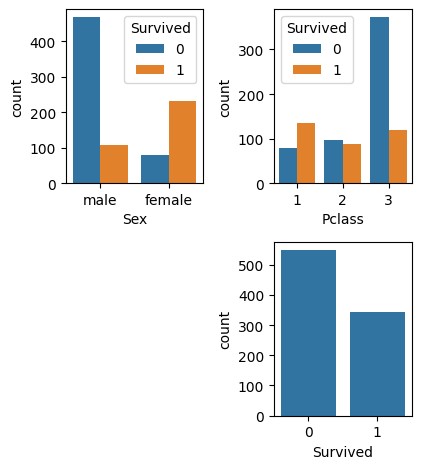

In [52]:
# plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.countplot(x=df['Sex'] , hue=df['Survived'])
plt.subplot(2,3,2)
sns.countplot(x=df['Pclass'] , hue=df['Survived'])
plt.subplot(2,3,5)
sns.countplot(x=df['Survived'])
plt.tight_layout()
plt.show()

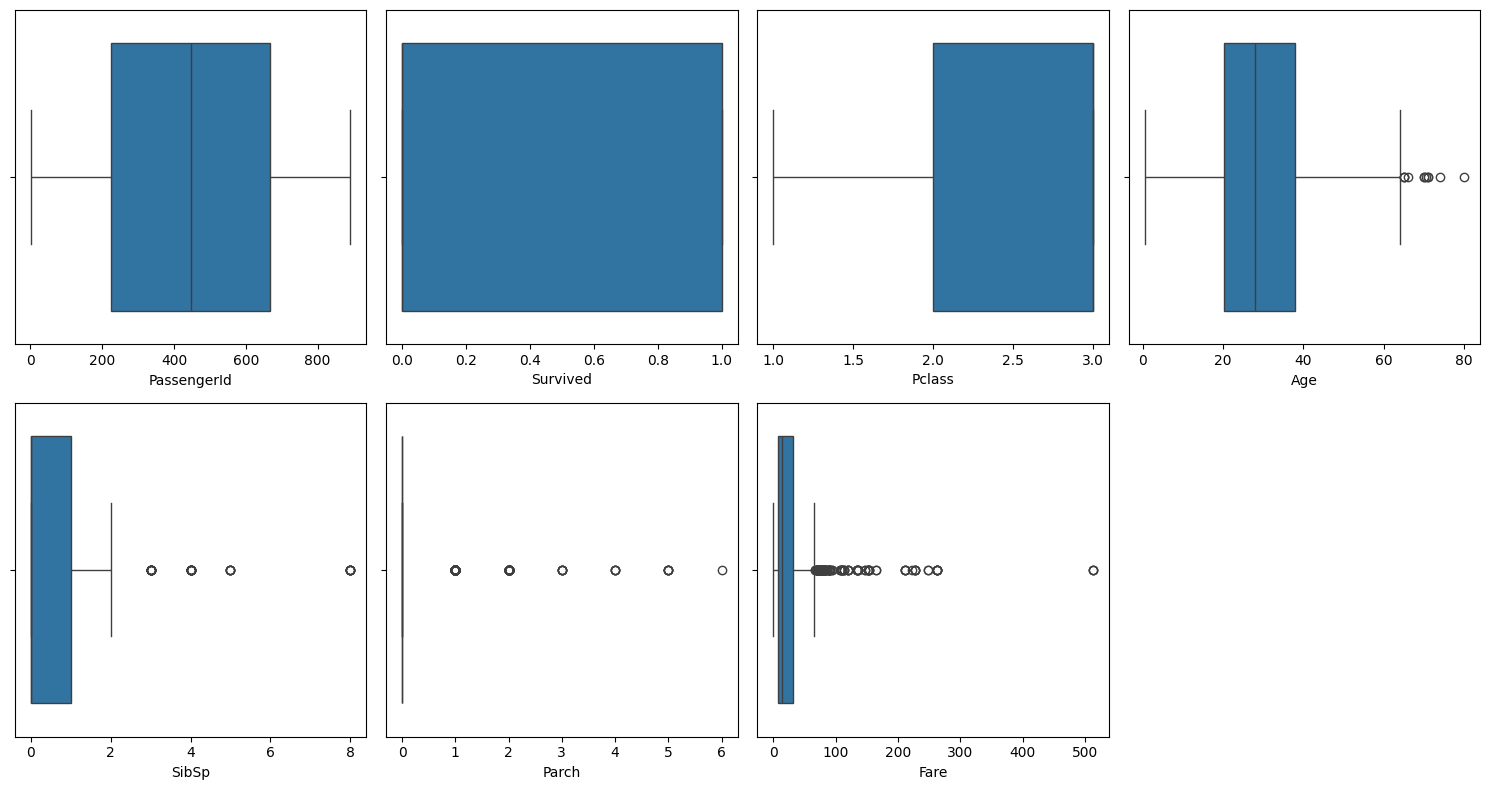

In [53]:
num = df.select_dtypes(exclude='object').columns
num
plt.figure(figsize=(15,8))

for i, col in enumerate(num,1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col])

plt.tight_layout()
plt.show()


In [54]:
num

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [55]:
df.drop(columns=['Age' , 'Name' , 'Parch' , 'PassengerId','SibSp','Cabin'] , inplace=True)

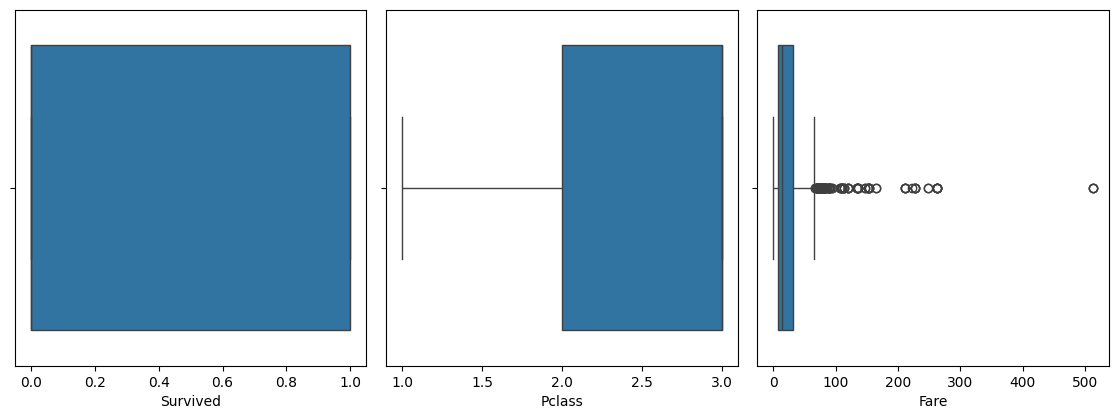

In [56]:
num = df.select_dtypes(exclude='object').columns

plt.figure(figsize=(15,8))

for i, col in enumerate(num, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[col])

plt.tight_layout()
plt.show()


In [57]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [58]:
num_col = X.select_dtypes(exclude=['object']).columns
cat_col = X.select_dtypes(include=['object']).columns

In [59]:
num_col,cat_col

(Index(['Pclass', 'Fare'], dtype='object'),
 Index(['Sex', 'Ticket', 'Embarked'], dtype='object'))

In [60]:
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [61]:
num_pip = Pipeline([
    ('Fill NAN',SimpleImputer(strategy='mean')),
    ('Scale' , StandardScaler())
])

In [62]:
cat_pip = Pipeline([
    ('Fill NAN',SimpleImputer(strategy='most_frequent')),
    ('Encode' , OneHotEncoder(handle_unknown='ignore'))
])

In [63]:
df_pip = ColumnTransformer([
    ('num' , num_pip , num_col),
    ('cat' , cat_pip , cat_col)
])

In [64]:
random_forest_model = Pipeline([
    ('PreProcess' , df_pip),
    ('model' , RandomForestClassifier(random_state=42))
])

In [65]:
Logestic_model = Pipeline([
    ('PreProcess' , df_pip),
    ('model' , LogisticRegression(random_state=42))
])

In [66]:
Tree_model = Pipeline([
    ('PreProcess' , df_pip),
    ('model' , DecisionTreeClassifier(random_state=42))
])

In [67]:
KNN_model = Pipeline([
    ('PreProcess' , df_pip),
    ('model' , KNeighborsClassifier())
])

In [68]:
XG_model = Pipeline([
    ('PreProcess' , df_pip),
    ('model' , XGBClassifier(random_state=42))
])

In [69]:
SVM_model = Pipeline([
    ('PreProcess' , df_pip),
    ('model' , SVC(random_state=42))
])

In [70]:
models = {"Random Forest" : random_forest_model,
        "Tree" : Tree_model,
        "Logestic" : Logestic_model,
        "KNN" : KNN_model,
        "XGB" : XG_model,
        "SVM" : SVM_model
        }

In [71]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
scores = []
for model_name , model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)*100
    scores.append({'model' : model_name , 'score' : acc})

In [75]:
scores = pd.DataFrame(scores)

<BarContainer object of 6 artists>

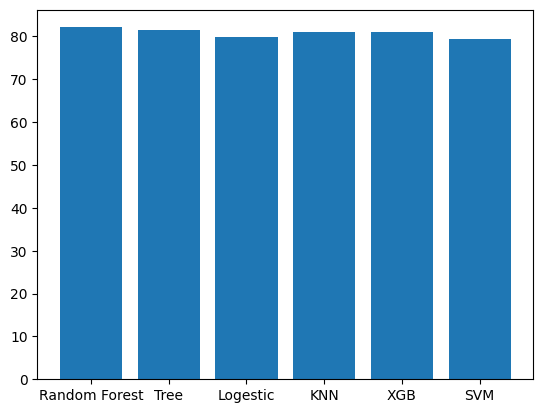

In [88]:
plt.bar(scores['model'] , scores['score'])

In [77]:
param_grid = {
    'model__n_estimators': [100, 300],
    'model__max_depth': [5, 7],
}

In [78]:
grid = GridSearchCV(random_forest_model , param_grid = param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [5, 7], 'model__n_estimators': [100, 300]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [79]:
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'model__max_depth': 7, 'model__n_estimators': 100}
Best Score: 0.8160015649452269


In [80]:
best_model = grid.best_estimator_

In [81]:
y_pred = best_model.predict(X_test)

In [82]:
best_model.score(X_train,y_train)*100

84.41011235955057

In [83]:
accuracy_score(y_test,y_pred)*100

80.44692737430168

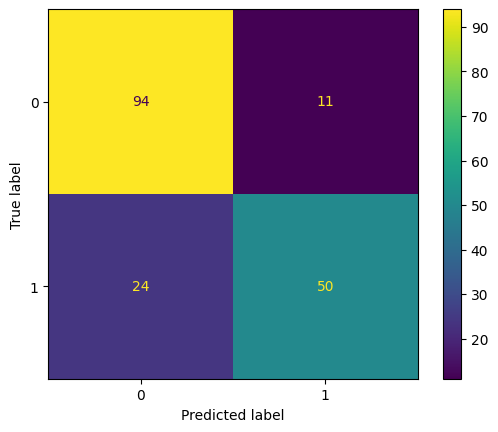

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)